# **Recipe Visualiation Application**

## **basic info**

In [ ]:
#uploads kaggle.json file which is a dictionary with user name and key.This file authenticates that we are a valid kaggle account holder
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#setting up kaggle credentials on the local machine.
#creates a directory named kaggle in home directory

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#copies the API command from kaggle to access the dataset
!kaggle datasets download -d hugodarwood/epirecipes

Dataset URL: https://www.kaggle.com/datasets/hugodarwood/epirecipes
License(s): unknown
epirecipes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzips the downloaded zip file

!unzip epirecipes.zip

Archive:  epirecipes.zip
replace epi_r.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: epi_r.csv               
  inflating: full_format_recipes.json  
  inflating: recipe.py               
  inflating: utils.py                


In [ ]:
# reads the unzipped json file using pandas

import pandas as pd
pd.read_json('full_format_recipes.json')

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
20125,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
20126,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
20127,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
20128,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


In [ ]:
# reads json file into dataframe 'recipes'
recipes=pd.read_json('full_format_recipes.json')

In [ ]:
# brief information about recipes
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


**epi_r.csv is a file with dummy variables in desc column of recipes**

In [ ]:
# to view all columns in a dataframe when number of columns is large
pd.set_option('display.max_columns', None)

In [ ]:
# reads csv file into dataframe 'menu'
menu=pd.read_csv('epi_r.csv')

In [ ]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [ ]:
menu.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

# **Data Cleaning**



## **1. Removing unnecessary columns and adding necessary columns**




In [ ]:
# dropping 'date' column as it doesn't contribute to the analysis
recipes.drop('date', axis=1,inplace=True)

In [ ]:
# dropping 'desc' column as there is another csv file with a better view
recipes.drop('desc', axis=1,inplace=True)

In [ ]:
import numpy as np
# adding a column to get count of ingredients for each title
# 'ingredient_count' will be NaN if 'ingredients' is NaN or empty
recipes['ingredient_count'] = recipes['ingredients'].apply(lambda x: len(x) if isinstance(x, list) and x else np.nan)

In [ ]:
recipes.head()

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0,15.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0,28.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0,6.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,10.0
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0,6.0


## **2. Removing duplicates**

In [ ]:
# converts columns(directions,categories,ingredients) with data as list into string for easy analysis
for col in recipes.columns:
    if recipes[col].apply(lambda x: isinstance(x, list)).any():
        recipes[col] = recipes[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

In [ ]:
# check for duplicates
recipes.duplicated().sum()

1834

In [ ]:
# displaying duplicated rows
recipes[recipes.duplicated()]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
340,Brush both sides of nori with sesame oil. Spri...,NaN,"Backyard BBQ,Grill/Barbecue,Bon Appétit",NaN,NaN,5.000,Seasoned Nori Wrappers,"4 sheets nori (dried seaweed sheets),2 teaspoo...",NaN,3.0
521,"Preheat oven to 400°F.,In a dry small heavy sk...",1.0,"Bake,Cocktail Party,Low Cal,Spice,Gourmet",21.0,0.0,3.750,Spiced Pita Toasts,"4 teaspoons cumin seeds,1 teaspoon coarse salt...",38.0,5.0
602,Heat butter in a 3-quart heavy saucepan over m...,3.0,"Condiment/Spread,Fruit Juice,Citrus,Christmas,...",194.0,2.0,3.750,Orange Balsamic Glaze,"1 1/2 tablespoons unsalted butter,1 cup finely...",697.0,9.0
718,Mince garlic and mash to a paste with a pinch ...,7.0,"Bread,Condiment/Spread,Fry,No-Cook,Quick & Eas...",95.0,1.0,0.000,Garlic Baguette Crumbs,"1 garlic clove,2 tablespoons olive oil,1/4 tea...",103.0,5.0
806,"In a large bowl, combine all of the ingredient...",1.0,"Condiment/Spread,Sauce,Fruit,Vinegar,Apple,Pea...",262.0,2.0,4.375,Golden Pineapple Chutney,"1/2 cup sugar,1/2 medium red onion, diced,1 1/...",438.0,14.0
...,...,...,...,...,...,...,...,...,...,...
20110,Makes enough spice rub for two whole chickens....,0.0,"Low Fat,Vegetarian,Quick & Easy,Spice,Vegan,Ed...",16.0,0.0,4.375,4-3-2-1 Spice Rub,"4 tablespoons kosher salt,3 tablespoons brown ...",2292.0,4.0
20117,"Bring half-and-half with cauliflower, covered ...",28.0,"Milk/Cream,Blender,Vegetable,Side,Vegetarian,Q...",364.0,11.0,3.125,Cauliflower Purée,"1 quart half-and-half,1 head cauliflower (2 po...",642.0,5.0
20119,"In a large pot, place the chicken legs, bay le...",59.0,"Wine,Chicken,Herb,Poultry,Dinner,Simmer,Boil,P...",843.0,59.0,2.500,Chicken with White Wine and Herbs,"8 chicken legs,3 bay leaves,1 teaspoon dried t...",351.0,15.0
20120,"Bring all ingredients to a simmer, covered dir...",NaN,"Food Processor,Fruit,Side,Vegetarian,Date,Red ...",NaN,NaN,2.500,Date Purée,"3 cups pitted dates (14 ounces),1 (750-ml) bot...",NaN,5.0


In [ ]:
#dropping duplicate rows
recipes.drop_duplicates(inplace=True)

In [ ]:
#rechecks for duplicate rows
recipes.duplicated().sum()

0

## **3. Handling Outliers**
Outliers are data points that significantly differ from the other observations in a dataset

In [ ]:
recipes.describe().round(2)

,fat,calories,protein,rating,sodium,ingredient_count
count,14479.00,14532.00,14499.00,18285.00,14531.00,18259.00
mean,362.73,6609.49,92.07,3.71,6561.56,10.11
std,21336.31,374394.96,3508.24,1.34,348057.46,4.56
min,0.00,0.00,0.00,0.00,0.00,1.00
25%,8.00,205.00,3.00,3.75,88.00,7.00
50%,18.00,345.00,9.00,4.38,304.00,9.00
75%,34.00,599.00,28.00,4.38,732.00,13.00
max,1722763.00,30111218.00,236489.00,5.00,27675110.00,51.00


**describe() shows presence of outliers in fat,calories,protein and sodium. There is a very large difference in 75% and max value. Also mean and standard deviation is very large compared to 50% and 75% of values.     
So identifying outliers with IQR(Inter Quartile Range) is prefered over z score.**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


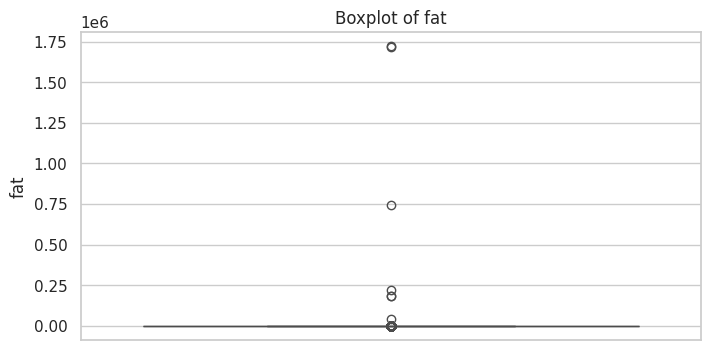

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


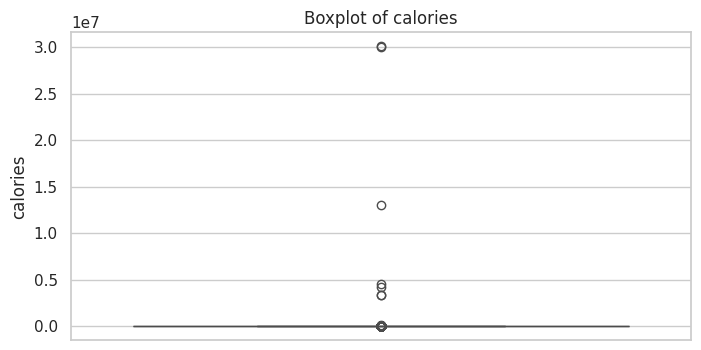

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


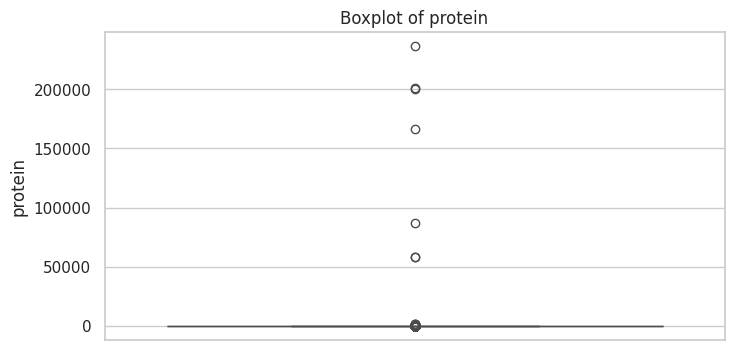

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


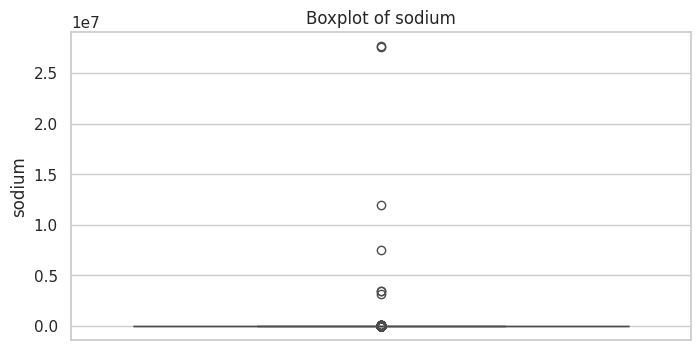

In [ ]:
# create a boxplot for each numeric column separately
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


numeric_columns = ['fat', 'calories', 'protein','sodium']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))  # Create a new figure for each plot
    sns.boxplot(y=recipes[col])  # Create the boxplot
    plt.title(f'Boxplot of {col}')  # Set the title
    plt.ylabel(col)  # Set the y-label
    plt.show()  # Display the plot

In [ ]:
# calculates IQR(Inter Quartile Range)= Q3(value at 75%) - Q1(value at 25%)
Q1 = recipes[['fat', 'calories', 'protein', 'sodium']].quantile(0.25)
Q3 = recipes[['fat', 'calories', 'protein', 'sodium']].quantile(0.75)
IQR = Q3 - Q1

# values less than (Q1-1.5*IQR) and values greater than (Q3+1.5*IQR)
# calculates bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify outliers
outliers = (recipes[['fat', 'calories', 'protein', 'sodium']] < lower_bound) | (recipes[['fat', 'calories', 'protein', 'sodium']] > upper_bound)

In [ ]:
outliers

,fat,calories,protein,sodium
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
20125,False,False,False,False
20126,False,False,False,False
20127,False,False,False,False
20128,False,False,False,False


In [ ]:
# number of outliers in each column
outliers.sum()

,0
fat,984
calories,907
protein,991
sodium,1040


In [ ]:
# displaying all rows which have atleast one outlier column
recipes[outliers.any(axis=1)]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
5,"Mix basil, mayonnaise and butter in processor ...",79.0,"Sandwich,Food Processor,Tomato,Kid-Friendly,Qu...",948.0,19.0,4.375,The Best Blts,2 1/2 cups (lightly packed) fresh basil leaves...,1042.0,9.0
53,Preheat oven to 400°F. Melt 1/4 cup butter in ...,87.0,"Chicken,Roast,High Fiber,Dinner,Bacon,Fall,Spr...",1203.0,89.0,5.000,Pancetta Roast Chicken with Walnut Stuffing,"8 tablespoons (1 stick) butter, divided,Choppe...",583.0,16.0
84,"Mix all ingredients in a small bowl.,Rub brisk...",54.0,"Beer,Bourbon,Beef,Braise,Dinner,Meat,Brisket,W...",856.0,45.0,4.375,Braised Brisket with Bourbon-Peach Glaze,"1 tablespoon plus 1 teaspoon kosher salt,1 tea...",1797.0,22.0
87,"Bring 5 cups water to a boil in a medium pot, ...",77.0,"Bon Appétit,Dinner,Chicken,Grains,Wheat/Gluten...",1143.0,63.0,0.000,Roast Chicken With Sorghum and Squash,"Kosher salt,1 cup sorghum,1/2 large butternut ...",311.0,13.0
94,Finely grind star anise in spice grinder or in...,70.0,"Citrus,Onion,Vegetable,Braise,Orange,Lamb Shan...",1118.0,92.0,3.125,Lamb Shanks Braised with Anise and Orange,"8 whole star anise,6 lamb shanks (about 1 poun...",1226.0,12.0
...,...,...,...,...,...,...,...,...,...,...
20108,"Combine oil, lemon juice, rosemary and generou...",95.0,"Beef,Marinate,Low Carb,Wheat/Gluten-Free,Lemon...",1168.0,74.0,3.750,Lemon and Rosemary T-Bone Steaks,"1 cup olive oil,1/3 cup fresh lemon juice,1/3 ...",131.0,4.0
20118,Combine all brining ingredients except pork lo...,57.0,"Pork,Roast,Super Bowl,Quick & Easy,Bacon,Pork ...",899.0,78.0,4.375,Bacon-Wrapped Maple Pork Loin,"8 cups water,1/3 cup kosher salt,2 tablespoons...",5684.0,16.0
20121,1. Preheat the oven to 400°F. Spray a baking s...,70.0,"Chicken,Poultry,Bake,Passover,Fennel,Shallot",1086.0,78.0,5.000,Crispy Salt and Pepper Chicken with Caramelize...,"Cooking spray,One 3 1/2-pound chicken, cut int...",1323.0,11.0
20124,Wash spareribs. Remove excess fat and gristle....,80.0,"Pork,Appetizer,Bake,Marinate,Sherry,Fall,Honey...",998.0,55.0,3.750,Chinese Barbecued Spareribs,"1 side pork spareribs, about 3 pounds,1/2 cup ...",2027.0,5.0


In [ ]:
# displaying all rows which have outlier in all column
recipes[outliers.all(axis=1)]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
297,Arrange rack in middle of oven; preheat to 425...,114.0,"Chicken,Dinner,Cabbage,Bacon,Potato,Roast,Whea...",1630.0,105.0,3.125,"Roast Chicken With Smothered Cabbage, Bacon, a...","1 lemon,3 garlic cloves, finely chopped,1/3 cu...",1730.0,14.0
717,Into a large kettle of boiling salted water pl...,449.0,"Lobster,Gourmet,Butter,Seafood",4570.0,110.0,0.000,Roast Lobster with Pink Butter Sauce (Langoust...,"1 1/4–1 1/2 pound lobster,1/4 cup unsalted but...",2773.0,12.0
772,Heat 1 tablespoon oil in heavy large shallow p...,540.0,"Chicken,Garlic,Rice,Bake,Sauté,Sausage,Shrimp,...",7141.0,470.0,4.375,Birthday Party Paella,"3 tablespoons olive oil,6 fresh Cajun or hot I...",6152.0,16.0
895,Preheat oven to 350°F. Butter bottom and sides...,187.0,"Cake,Chocolate,Dessert,Bake,Kid-Friendly,Plum,...",3809.0,91.0,4.375,Chocolate Plum Cake,"3/4 cup (1 1/2 sticks) unsalted butter, plus m...",2291.0,11.0
930,Combine 4 quarts water and 1 cup coarse salt i...,94.0,"Herb,turkey,Roast,Christmas,Thanksgiving,Brine...",1961.0,250.0,5.000,Roast Turkey with Corn Bread Stuffing and Gibl...,"4 quarts water,1 cup coarse salt,1 18-pound tu...",9573.0,30.0
...,...,...,...,...,...,...,...,...,...,...
19703,Put oven rack in middle position and preheat o...,182.0,"Bean,Chicken,Poultry,Tomato,Bake,Sauté,Bacon,F...",2631.0,162.0,3.750,Baked Chicken with White Beans and Tomatoes,"6 bacon slices (1/4 lb total), cut into 1-inch...",1828.0,5.0
19749,Position rack in center of oven and preheat to...,747374.0,"Berry,Fruit,Nut,Dessert,Bake,Thanksgiving,Cran...",13062948.0,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","1 cup (packed) golden brown sugar,2 large eggs...",12005810.0,12.0
19771,"Stir together 1 stick softened butter, thyme, ...",111.0,"Chicken,Herb,Lemon,Rosemary,Grill/Barbecue,Thy...",1465.0,108.0,3.125,Grilled Poussins with Lemon Herb Butter,1 1/2 sticks (3/4 cup) unsalted butter (1 stic...,1741.0,11.0
19832,Heat oil in heavy large saucepan over medium h...,115.0,"Pasta,Tomato,Bake,Kid-Friendly,Dinner,Mozzarel...",3842.0,189.0,4.375,Three-Cheese Lasagna with Italian Sausage,"1 tablespoon olive oil,1 cup chopped onion,3/4...",2912.0,19.0


In [ ]:
# replacing outliers with  more typical values(median)

median_fat = recipes['fat'].median()
recipes['fat'] = np.where(outliers['fat'], median_fat, recipes['fat'])

median_calories = recipes['calories'].median()
recipes['calories'] = np.where(outliers['calories'], median_calories, recipes['calories'])

median_protein = recipes['protein'].median()
recipes['protein'] = np.where(outliers['protein'], median_protein, recipes['protein'])

median_sodium = recipes['sodium'].median()
recipes['sodium'] = np.where(outliers['sodium'], median_sodium, recipes['sodium'])


In [ ]:
recipes.describe().round(2)

,fat,calories,protein,rating,sodium,ingredient_count
count,14479.00,14532.00,14499.00,18285.00,14531.00,18259.00
mean,20.34,387.48,14.25,3.71,392.72,10.11
std,16.49,249.70,15.25,1.34,388.31,4.56
min,0.00,0.00,0.00,0.00,0.00,1.00
25%,8.00,205.00,3.00,3.75,88.00,7.00
50%,18.00,345.00,9.00,4.38,304.00,9.00
75%,28.00,518.25,20.00,4.38,576.00,13.00
max,73.00,1190.00,65.00,5.00,1698.00,51.00


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


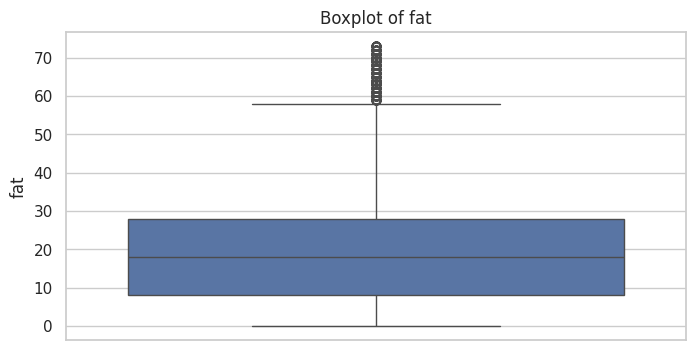

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


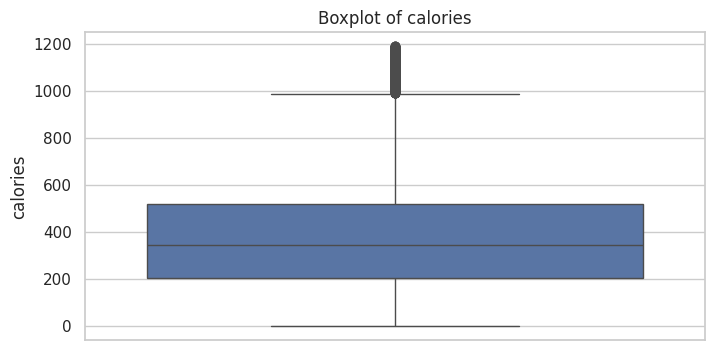

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


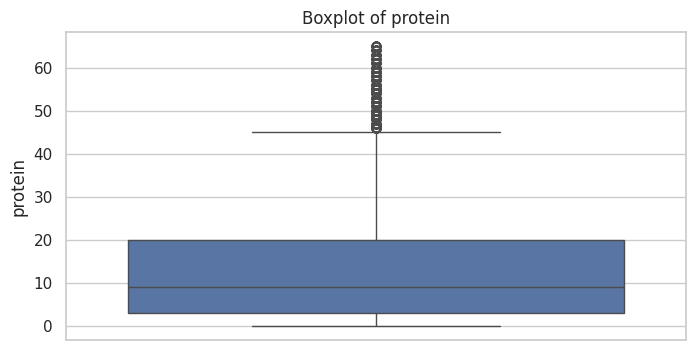

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


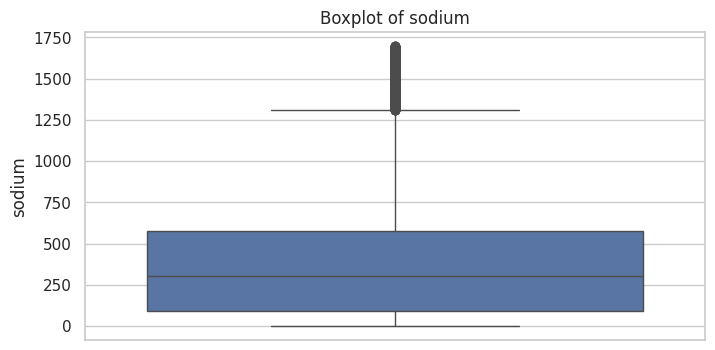

In [ ]:
# create a boxplot for each numeric column separately
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


numeric_columns = ['fat', 'calories', 'protein','sodium']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))  # Create a new figure for each plot
    sns.boxplot(y=recipes[col])  # Create the boxplot
    plt.title(f'Boxplot of {col}')  # Set the title
    plt.ylabel(col)  # Set the y-label
    plt.show()  # Display the plot

In [ ]:
#checking for outliers using z score
from scipy.stats import zscore

# calculate the Z-scores
z_scores = zscore(recipes[['fat', 'calories', 'protein', 'sodium']])

# (z_scores) > 3 are outlier values
(abs(z_scores) > 3).any(axis=1).sum()


0

## **4. Handling null values**

In [ ]:
#checks for rows where all columns contains null values
recipes[recipes.isnull().all(axis=1)]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#drops the rows where all columns contains null values
recipes.dropna(how='all',inplace=True)

In [ ]:
recipes.shape

(18295, 10)

In [ ]:
# shows the number of null values in each column
recipes.isnull().sum()

,0
directions,0
fat,3816
categories,0
calories,3763
protein,3796
rating,10
title,0
ingredients,0
sodium,3764
ingredient_count,36


In [ ]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18295 entries, 0 to 20129
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   directions        18295 non-null  object 
 1   fat               14479 non-null  float64
 2   categories        18295 non-null  object 
 3   calories          14532 non-null  float64
 4   protein           14499 non-null  float64
 5   rating            18285 non-null  float64
 6   title             18295 non-null  object 
 7   ingredients       18295 non-null  object 
 8   sodium            14531 non-null  float64
 9   ingredient_count  18259 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.5+ MB


In [ ]:
recipes.head()

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
0,"1. Place the stock, lentils, celery, carrot, t...",7.0,"Sandwich,Bean,Fruit,Tomato,turkey,Vegetable,Ki...",426.0,30.0,2.500,"Lentil, Apple, and Turkey Wrap","4 cups low-sodium vegetable or chicken stock,1...",559.0,15.0
1,Combine first 9 ingredients in heavy medium sa...,23.0,"Food Processor,Onion,Pork,Bake,Bastille Day,Ne...",403.0,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"1 1/2 cups whipping cream,2 medium onions, cho...",1439.0,28.0
2,In a large heavy saucepan cook diced fennel an...,7.0,"Soup/Stew,Dairy,Potato,Vegetable,Fennel,Gourme...",165.0,6.0,3.750,Potato and Fennel Soup Hodge,"1 fennel bulb (sometimes called anise), stalks...",165.0,6.0
3,Heat oil in heavy large skillet over medium-hi...,NaN,"Fish,Olive,Tomato,Sauté,Low Fat,Low Cal,High F...",NaN,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"2 tablespoons extra-virgin olive oil,1 cup cho...",NaN,10.0
4,Preheat oven to 350°F. Lightly grease 8x8x2-in...,32.0,"Cheese,Dairy,Pasta,Vegetable,Side,Bake,Vegetar...",547.0,20.0,3.125,Spinach Noodle Casserole,"1 12-ounce package frozen spinach soufflé, tha...",452.0,6.0


 **From the dataframe shown above, it is clear that there are many missing values in ingredients column, Eventhough it is showing 0 null values.
To account this, missing values are replaced with Nan**

In [ ]:
recipes['ingredients'] = recipes['ingredients'].replace("", np.nan)

In [ ]:
# shows the number of null values in each column
recipes.isnull().sum()

,0
directions,0
fat,3816
categories,0
calories,3763
protein,3796
rating,10
title,0
ingredients,36
sodium,3764
ingredient_count,36


In [ ]:
recipes[recipes[['fat', 'calories', 'protein', 'sodium']].isnull().all(axis=1)]


,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
3,Heat oil in heavy large skillet over medium-hi...,NaN,"Fish,Olive,Tomato,Sauté,Low Fat,Low Cal,High F...",NaN,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"2 tablespoons extra-virgin olive oil,1 cup cho...",NaN,10.0
6,Cook potatoes and carrots in large pot of boil...,NaN,"Salad,Potato,Side,Easter,Low Fat,Quick & Easy,...",NaN,NaN,4.375,Ham and Spring Vegetable Salad with Shallot Vi...,"1 1/2 pounds small red-skinned potatoes, each ...",NaN,7.0
7,Stir together sugar and chili powder. Whisk eg...,NaN,"Egg,Fruit,No-Cook,Cocktail Party,Vegetarian,Wi...",NaN,NaN,3.750,Spicy-Sweet Kumquats,"6 tablespoons granulated sugar,1 1/2 tablespoo...",NaN,5.0
11,"Preheat oven to 300°F.,Wrap blacan tightly in ...",NaN,"Soup/Stew,Chicken,Garlic,Ginger,Pepper,Breakfa...",NaN,NaN,4.375,Spicy Noodle Soup,"11/2 teaspoons blacan (shrimp paste),2 thick o...",NaN,20.0
21,"Preheat oven to 400°F. In a shallow bowl, comb...",NaN,"Chicken,Bake,Low Fat,Kid-Friendly,Self",NaN,NaN,3.750,"""Fried"" Chicken","3 cups Italian-style breadcrumbs,2 tbsp paprik...",NaN,7.0
...,...,...,...,...,...,...,...,...,...,...
20076,Sliced roasted red peppers from jar Mix pepero...,NaN,"Cheese,Onion,Quick & Easy,Backyard BBQ,Lunch,M...",NaN,NaN,5.000,Muffuletta Hot Dogs,"1 cup sliced peperoncini with 1 cup brine,1 cu...",NaN,8.0
20090,In a large saucepan of boiling salted water co...,NaN,"Pasta,Sauté,Quick & Easy,Parmesan,Sausage,Bell...",NaN,NaN,3.750,Pepperoni Spaghetti Cakes,"1/4 pound spaghetti,1/3 cup finely chopped sli...",NaN,9.0
20094,Swirl poire Williams in 2 glasses to coat; dis...,NaN,"Fruit Juice,Liqueur,Alcoholic,Ginger,Brandy,Fa...",NaN,NaN,3.125,Autumn Pear Chip,"Poire Williams (clear pear brandy),6 quarter-s...",NaN,7.0
20104,Heat 1 tablespoon oil in a large heavy pot ove...,NaN,"Egg,Leafy Green,Vegetable,Brunch,Vegetarian,Hi...",NaN,NaN,5.000,Spinach with Chickpeas and Fried Eggs,"3 tablespoons olive oil, divided, plus more,4 ...",NaN,12.0


In [ ]:
# since there are 3763 rows with no nutrient information,we can drop these rows
recipes = recipes[~recipes[['fat', 'calories', 'protein', 'sodium']].isnull().all(axis=1)]

In [ ]:
recipes.isnull().sum()

,0
directions,0
fat,53
categories,0
calories,0
protein,33
rating,6
title,0
ingredients,0
sodium,1
ingredient_count,0


In [ ]:
recipes[recipes['rating'].isnull()]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
560,"Whisk chile, oil, lime juice, soy sauce, brown...",39.0,,508.0,25.0,NaN,Asian Chicken and Cabbage Salad,1 red jalapeño or Fresno chile with some seeds...,538.0,16.0
1749,Whisk together sauce ingredients in a bowl unt...,22.0,,579.0,20.0,NaN,Spicy Summer Rolls with Peanut Dipping Sauce,"2/3 cup hoisin sauce (see Cooks' notes:),1/3 c...",1160.0,15.0
3931,Beat 1/2 cup cream in a medium bowl until stif...,17.0,,255.0,5.0,NaN,Classic Chocolate Mousse,"3/4 cup chilled heavy cream, divided,4 large e...",74.0,7.0
8262,"Preheat oven to 400°. Wash beets, leaving some...",0.0,,117.0,3.0,NaN,"Blood Orange, Beet, and Fennel Salad","2 medium red beets, tops trimmed,2 medium gold...",51.0,12.0
12077,Place pears and granulated sugar in a medium s...,18.0,,355.0,4.0,NaN,Tarte Bourdaloue,"2 Bosc or Anjou pears, peeled, cored and quart...",269.0,19.0
19119,Use a fork to prick the chicken breasts all ov...,28.0,,462.0,42.0,NaN,Chicken Tikka Masala,"1 1/2 pounds boneless, skinless chicken breast...",704.0,22.0


In [ ]:
# filling null values in ratings with 0, assuming these are unrated
recipes['rating'] = recipes['rating'].fillna(0)

<ipython-input-227-1e996c61d704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['rating'] = recipes['rating'].fillna(0)


In [ ]:
recipes[recipes['sodium'].isnull()]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
687,"Preheat oven to 350° F.,In a baking pan toast ...",0.0,"Hazelnut,Gourmet",4.0,0.0,3.75,To Toast and Skin Hazelnuts,Hazelnuts,NaN,1.0


In [ ]:
# there is only one row with null value in sodium which has 0 fat and protein, fill sodium as 0. Also the only ingredient hazlenut have 0 sodium content
recipes['sodium'] = recipes['sodium'].fillna(0)

In [ ]:
recipes[recipes['fat'].isnull()]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
285,"When salting water for cooking, use 1 tablespo...",NaN,"Boil,Gourmet",0.0,NaN,3.750,Salted Water for Boiling,"Salt,Water",0.0,2.0
794,In a silver julep cup or 10-ounce glass crush ...,NaN,"Bourbon,Alcoholic,Cocktail Party,Kentucky Derb...",122.0,NaN,5.000,Mint Julep,6 fresh mint leaves plus 1 mint sprig for garn...,0.0,5.0
1483,"To make the milk: In a high-speed blender, com...",NaN,"Nut,No-Cook,Raw",0.0,NaN,0.000,Cashew Milk and Cashew Flour,"3 cups raw cashews, soaked for 10 to 12 hours ...",0.0,2.0
1659,Combine ingredients in a mixing glass and stir...,NaN,"Liqueur,Alcoholic,Cocktail Party,Spirit,Pernod...",134.0,0.0,0.000,Piccadilly,"1 1/2 ounces gin,3/4 ounce dry vermouth,Dash P...",2.0,5.0
2015,In a small cocktail pitcher combine the bourbo...,NaN,"Bitters,Bourbon,Alcoholic,Christmas,Cocktail P...",121.0,0.0,3.750,Manhattan II,1 1/2 ounces (1 jigger) bourbon or other whisk...,1.0,5.0
2087,Bring vinegar and sugar to a boil in a 1-quart...,NaN,"Sauce,Dessert,Vinegar,Vegan,Gourmet,Fat Free,K...",74.0,0.0,4.375,Sherry Vinegar Syrup,"1/2 cup Sherry vinegar,1/2 cup packed light br...",6.0,2.0
2243,Put rice in a bowl and wash in several changes...,NaN,"Side,Kid-Friendly,Dinner,Lunch,Healthy,Gourmet...",380.0,6.0,5.000,Simple Japanese White Rice,"3 cups short-grain sushi rice,3 cups water",5.0,2.0
2608,In mixing glass or cocktail shaker filled with...,NaN,"Gin,Liqueur,Alcoholic,Cocktail Party,Wedding,B...",163.0,0.0,5.000,Negroni,"1 ounce gin,1 ounce sweet vermouth,1 ounce Cam...",2.0,3.0
3055,Combine all ingredients in a cocktail shaker a...,NaN,"Bitters,Rum,Alcoholic,Cocktail Party,Spirit,Ho...",132.0,0.0,0.000,Bushranger,"1 1/2 ounces light rum,1 to 1 1/2 ounces Dubon...",2.0,4.0
3347,Stir sugar and water in medium saucepan over m...,NaN,"Non-Alcoholic,Cocktail Party,Boil,Bon Appétit,...",129.0,NaN,2.500,Simple Syrup,"1 cup sugar,1 cup water",2.0,2.0


In [ ]:
recipes[recipes['protein'].isnull()]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
285,"When salting water for cooking, use 1 tablespo...",NaN,"Boil,Gourmet",0.0,NaN,3.750,Salted Water for Boiling,"Salt,Water",0.0,2.0
794,In a silver julep cup or 10-ounce glass crush ...,NaN,"Bourbon,Alcoholic,Cocktail Party,Kentucky Derb...",122.0,NaN,5.000,Mint Julep,6 fresh mint leaves plus 1 mint sprig for garn...,0.0,5.0
1483,"To make the milk: In a high-speed blender, com...",NaN,"Nut,No-Cook,Raw",0.0,NaN,0.000,Cashew Milk and Cashew Flour,"3 cups raw cashews, soaked for 10 to 12 hours ...",0.0,2.0
2963,Combine all ingredients in a cocktail shaker a...,0.0,"Gin,Alcoholic,Cocktail Party,Cocktail,Mint,Cha...",164.0,NaN,0.000,Ginger Stinger or White Way,"1 or 1 1/2 ounces gin,1/2 ounce white crème de...",6.0,3.0
3347,Stir sugar and water in medium saucepan over m...,NaN,"Non-Alcoholic,Cocktail Party,Boil,Bon Appétit,...",129.0,NaN,2.500,Simple Syrup,"1 cup sugar,1 cup water",2.0,2.0
3653,In a dry large deep heavy skillet cook the sug...,NaN,"Sauce,Thanksgiving,Low Sodium,Fall,Winter,Gourmet",449.0,NaN,3.750,Bourbon Burnt Sugar Sauce,"1 1/2 cups sugar,1/3 cup bourbon",1.0,2.0
3663,Combine the water and sugar in a small saucepa...,NaN,,96.0,NaN,0.000,Simple Syrup,"1/2 cup (4.3 oz / 120 g) water,1/2 cup (3.5 oz...",1.0,2.0
3926,Combine all ingredients in a cocktail shaker a...,NaN,"Gin,Alcoholic,Cocktail Party,Cocktail,Pernod,W...",256.0,NaN,0.000,Bunny Hug or Earthquake,"3/4 ounce gin,3/4 ounce whiskey,3/4 oumce Pern...",1.0,4.0
4319,Combine 3 cups water and 3 cups sugar in mediu...,NaN,"Dessert,Cocktail Party,Bon Appétit,Pittsburgh,...",194.0,NaN,5.000,Simple Syrup,"3 cups water,3 cups sugar",3.0,2.0
4591,Sift 1/4 cup cream of tartar and 2 tablespoons...,NaN,"Quick & Easy,Bon Appétit",23.0,NaN,4.375,Homemade Baking Powder,"1/4 cup of cream of tartar,2 tablespoons bakin...",304.0,2.0


In [ ]:
recipes[recipes[['fat','protein']].isnull().all(axis=1)]

,directions,fat,categories,calories,protein,rating,title,ingredients,sodium,ingredient_count
285,"When salting water for cooking, use 1 tablespo...",NaN,"Boil,Gourmet",0.0,NaN,3.750,Salted Water for Boiling,"Salt,Water",0.0,2.0
794,In a silver julep cup or 10-ounce glass crush ...,NaN,"Bourbon,Alcoholic,Cocktail Party,Kentucky Derb...",122.0,NaN,5.000,Mint Julep,6 fresh mint leaves plus 1 mint sprig for garn...,0.0,5.0
1483,"To make the milk: In a high-speed blender, com...",NaN,"Nut,No-Cook,Raw",0.0,NaN,0.000,Cashew Milk and Cashew Flour,"3 cups raw cashews, soaked for 10 to 12 hours ...",0.0,2.0
3347,Stir sugar and water in medium saucepan over m...,NaN,"Non-Alcoholic,Cocktail Party,Boil,Bon Appétit,...",129.0,NaN,2.500,Simple Syrup,"1 cup sugar,1 cup water",2.0,2.0
3653,In a dry large deep heavy skillet cook the sug...,NaN,"Sauce,Thanksgiving,Low Sodium,Fall,Winter,Gourmet",449.0,NaN,3.750,Bourbon Burnt Sugar Sauce,"1 1/2 cups sugar,1/3 cup bourbon",1.0,2.0
3663,Combine the water and sugar in a small saucepa...,NaN,,96.0,NaN,0.000,Simple Syrup,"1/2 cup (4.3 oz / 120 g) water,1/2 cup (3.5 oz...",1.0,2.0
3926,Combine all ingredients in a cocktail shaker a...,NaN,"Gin,Alcoholic,Cocktail Party,Cocktail,Pernod,W...",256.0,NaN,0.000,Bunny Hug or Earthquake,"3/4 ounce gin,3/4 ounce whiskey,3/4 oumce Pern...",1.0,4.0
4319,Combine 3 cups water and 3 cups sugar in mediu...,NaN,"Dessert,Cocktail Party,Bon Appétit,Pittsburgh,...",194.0,NaN,5.000,Simple Syrup,"3 cups water,3 cups sugar",3.0,2.0
4591,Sift 1/4 cup cream of tartar and 2 tablespoons...,NaN,"Quick & Easy,Bon Appétit",23.0,NaN,4.375,Homemade Baking Powder,"1/4 cup of cream of tartar,2 tablespoons bakin...",304.0,2.0
4835,Heat sugar and water in a small saucepan over ...,NaN,"Quick & Easy,Bon Appétit",129.0,NaN,5.000,Simple Syrup,"1 cup sugar,1 cup water",2.0,2.0


In [ ]:
recipes[recipes[['fat','protein']].isnull().all(axis=1)].shape

(30, 10)

In [ ]:
# most of the recipes with null values in fat, protein are either drinks or some simple recipes, which we can fill with 0
recipes['fat'] = recipes['fat'].fillna(0)
recipes['protein'] = recipes['protein'].fillna(0)

In [ ]:
recipes.isnull().sum()

,0
directions,0
fat,0
categories,0
calories,0
protein,0
rating,0
title,0
ingredients,0
sodium,0
ingredient_count,0


# **Exploratory Data Analysis**

**Basic Information:**

In [ ]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14532 entries, 0 to 20129
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   directions        14532 non-null  object 
 1   fat               14532 non-null  float64
 2   categories        14532 non-null  object 
 3   calories          14532 non-null  float64
 4   protein           14532 non-null  float64
 5   rating            14532 non-null  float64
 6   title             14532 non-null  object 
 7   ingredients       14532 non-null  object 
 8   sodium            14532 non-null  float64
 9   ingredient_count  14532 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.2+ MB


**Descriptive Statistics:**

In [ ]:
recipes.describe().round(2)

,fat,calories,protein,rating,sodium,ingredient_count
count,14532.00,14532.00,14532.00,14532.00,14532.00,14532.00
mean,20.27,387.48,14.21,3.75,392.70,10.24
std,16.51,249.70,15.25,1.29,388.31,4.64
min,0.00,0.00,0.00,0.00,0.00,1.00
25%,8.00,205.00,3.00,3.75,88.00,7.00
50%,18.00,345.00,9.00,4.38,304.00,10.00
75%,28.00,518.25,20.00,4.38,576.00,13.00
max,73.00,1190.00,65.00,5.00,1698.00,51.00


**Visualizations:**

**1. Histograms for numerical columns**

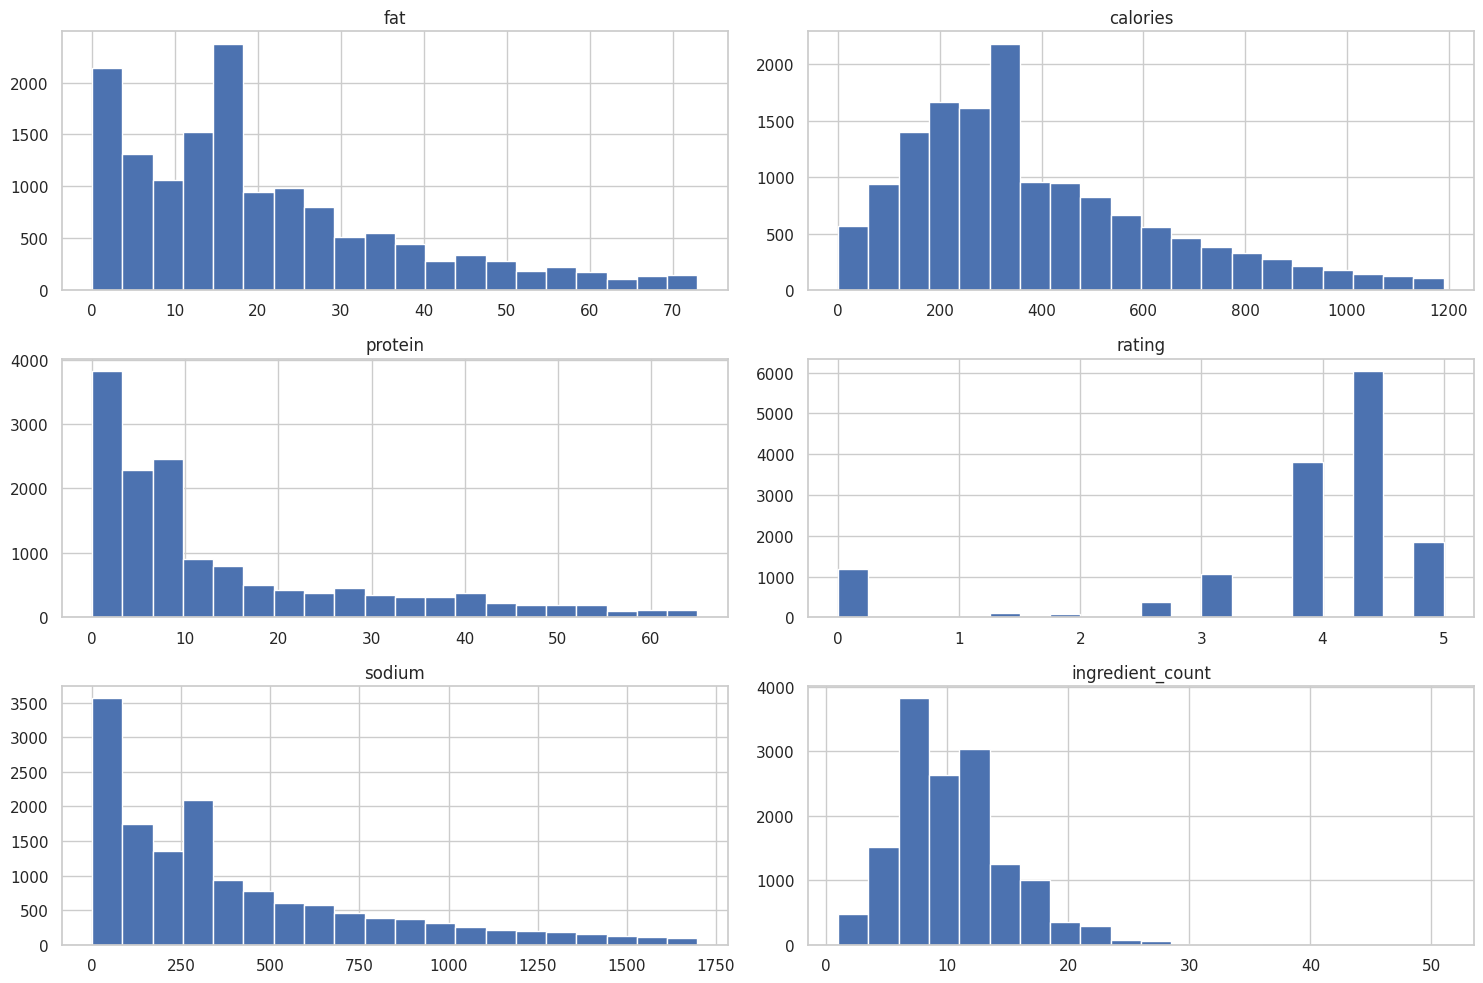

In [ ]:
recipes[['fat', 'calories', 'protein', 'rating', 'sodium', 'ingredient_count']].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

**2. Correlation Heatmap**

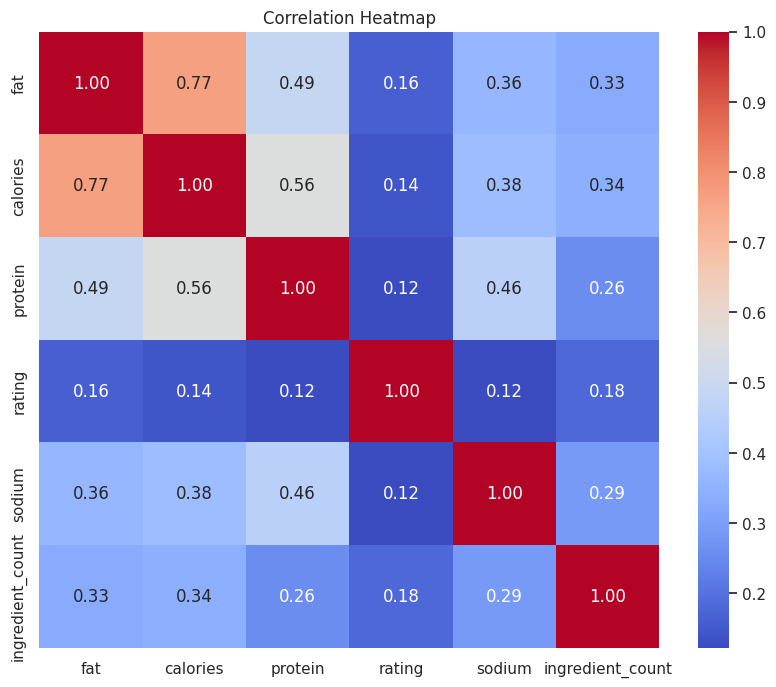

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = recipes[['fat', 'calories', 'protein', 'rating', 'sodium', 'ingredient_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**3. Histogram of Rating**



In [ ]:
recipes['rating'].value_counts().sort_index()

,count
rating,
0.000,1200
1.250,112
1.875,73
2.500,372
3.125,1062
3.750,3816
4.375,6040
5.000,1857


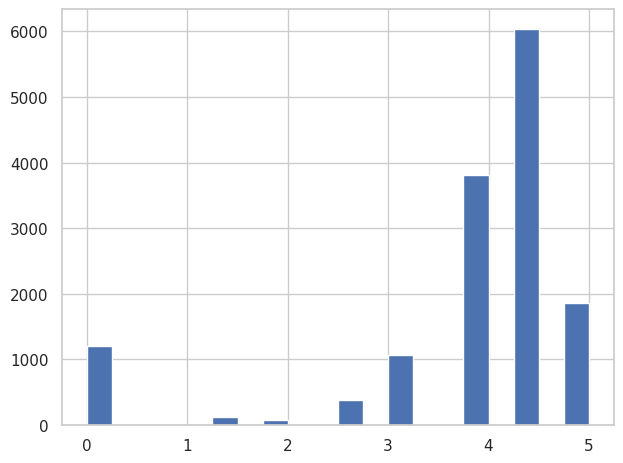

In [ ]:
recipes['rating'].hist(bins=20)
plt.tight_layout()
plt.show()

**4.Scatter plot between number of ingredients and rating**

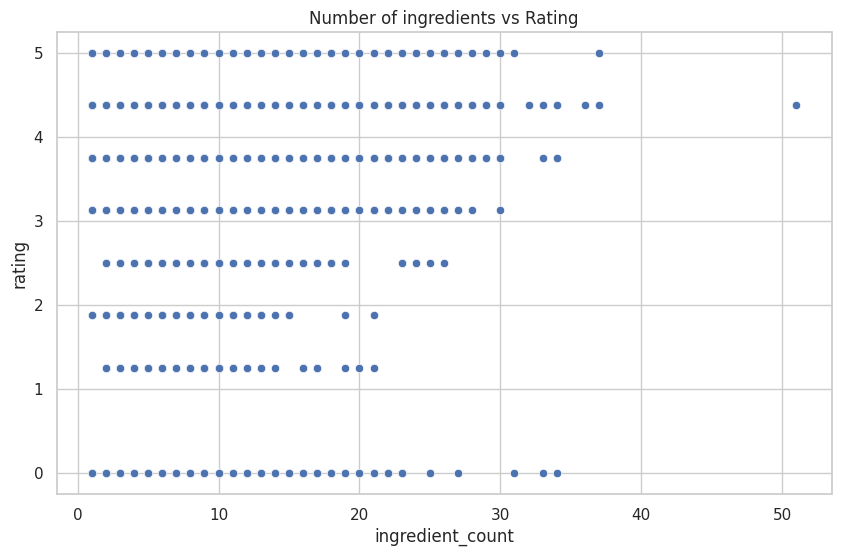

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ingredient_count', y='rating', data=recipes)
plt.title('Number of ingredients vs Rating')
plt.show()

**5.Count plot of Ratings for recipes with advance preparation**

In [ ]:
s1=menu[menu['advance prep required']==1][['title','advance prep required']]


In [ ]:
merged_df = pd.merge(recipes, s1, on='title', how='inner')

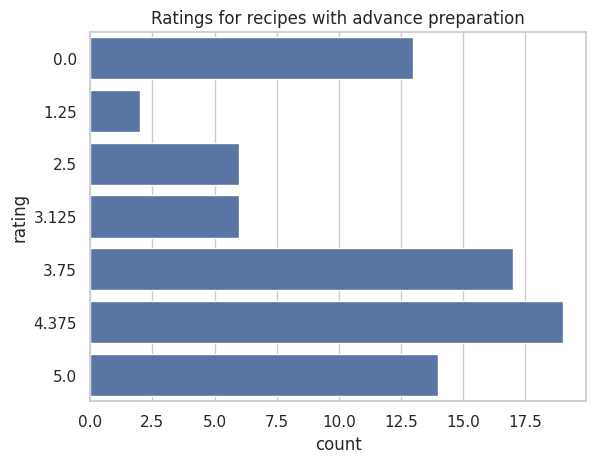

In [ ]:
sns.countplot(y='rating', data=merged_df)
plt.title('Ratings for recipes with advance preparation')
plt.show()

**6. Count plot of ratings for quick and healthy recipes**

In [ ]:
s2=menu[menu['quick and healthy']==1][['title','quick and healthy']]

In [ ]:
merged_df1 = pd.merge(recipes, s2, on='title', how='inner')

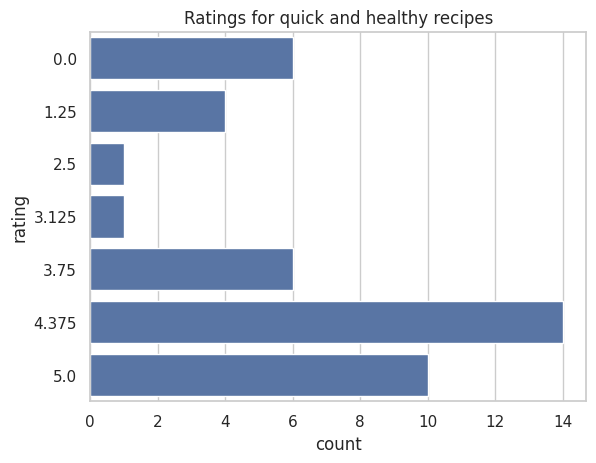

In [ ]:
sns.countplot(y='rating', data=merged_df1)
plt.title('Ratings for quick and healthy recipes')
plt.show()

# **Insights**

**Eventhough most of the recipes are low in fat, calories, sodium and protein, considering each recipe as a meal,it is meeting the per meal nutrient reuirements.**

**Some of the recipes have high sodium content,higher than the daily requirement.**

**Fat and calories show high correlation, indicating that fat also contribute to calories.**

**Most of the recipes have rating above 3, suggesting that the directions/ instructions for cooking are excellent.**

**Recipes with less than 20 ingredients have more rating counts,implying that people prefer to cook with less number of ingredients.**

**Recipes which requires advance preparation are having higher ratings, demonstrating the recipes are worth cooking but a higher number of 0 ratings is pointing to less success rates of these recipes.**

**Quick and healthy recipes have most of the ratings above 3.5, indicating people are more inclined to healthy recipes which can be made quickly.**






